## POLYNOIMAL REGRESSION

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
x = 6 * np.random.rand(200, 1) -3
y = 0.8 * x**2 + 0.9 + x + 2 + np.random.rand(200, 1)

In [3]:
x

array([[ 1.24783658],
       [ 2.91622822],
       [-1.46175978],
       [ 2.32347076],
       [ 1.83478284],
       [-2.97062552],
       [ 1.50296315],
       [-1.72623758],
       [ 2.97167441],
       [-1.15066314],
       [ 2.11349061],
       [-1.58862205],
       [ 0.96279689],
       [-2.50332802],
       [-0.43415638],
       [-2.76765896],
       [ 2.45652849],
       [ 2.7920496 ],
       [ 1.44658128],
       [ 2.55353454],
       [ 2.50692782],
       [-1.69817045],
       [ 2.61785053],
       [-0.30968049],
       [ 0.12094912],
       [ 1.40729432],
       [-1.35972183],
       [ 2.88193696],
       [-1.77466574],
       [-1.40989632],
       [-2.89974959],
       [ 0.53601458],
       [ 1.56981789],
       [ 1.89647696],
       [-2.70837912],
       [-1.95683005],
       [ 2.07996402],
       [-0.52335104],
       [ 0.70523177],
       [ 1.62086431],
       [-2.69057904],
       [-2.81954522],
       [ 2.24661819],
       [ 0.31100603],
       [-2.90683969],
       [-1

In [4]:
y

array([[ 6.20351451],
       [12.76399782],
       [ 3.50543454],
       [10.21440979],
       [ 7.95409458],
       [ 7.29251361],
       [ 6.31239453],
       [ 3.68377928],
       [13.03062229],
       [ 3.411483  ],
       [ 8.67204204],
       [ 3.74201895],
       [ 5.35538627],
       [ 6.09109625],
       [ 3.04097011],
       [ 6.39737274],
       [10.42159285],
       [12.73549459],
       [ 6.63615281],
       [11.44437295],
       [11.06093646],
       [ 3.57243841],
       [11.62414666],
       [ 3.08669939],
       [ 3.36970733],
       [ 6.6064361 ],
       [ 3.04674025],
       [13.23595401],
       [ 3.93996786],
       [ 3.24645949],
       [ 7.31163445],
       [ 3.98814803],
       [ 6.51631496],
       [ 8.07077612],
       [ 6.84064086],
       [ 4.4308338 ],
       [ 8.74506011],
       [ 3.22434252],
       [ 4.94544899],
       [ 7.32968701],
       [ 6.0360687 ],
       [ 6.70012473],
       [ 9.61355058],
       [ 3.81141865],
       [ 7.60716523],
       [ 3

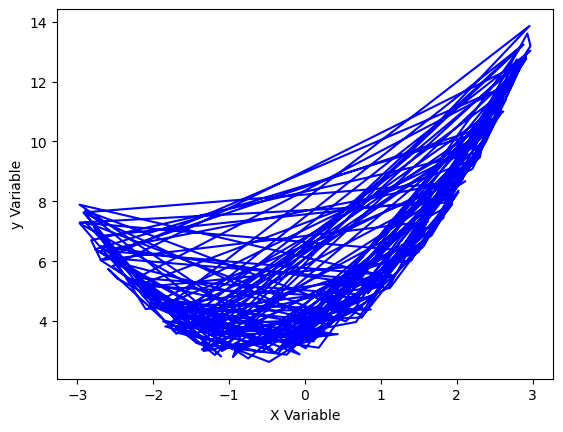

In [5]:
plt.plot(x ,y, 'b')
plt.xlabel("X Variable")
plt.ylabel("y Variable")
plt.show()

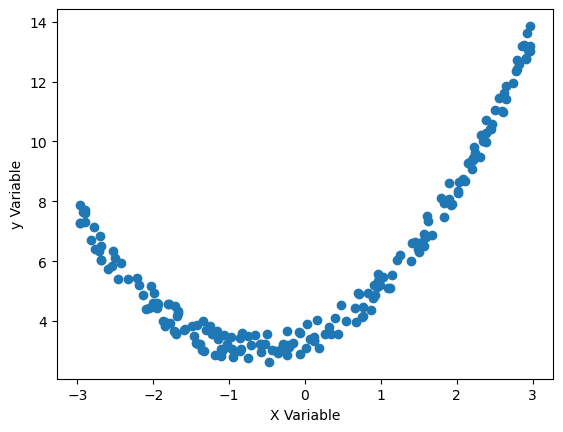

In [6]:
plt.scatter(x=x ,y=y)
plt.xlabel("X Variable")
plt.ylabel("y Variable")
plt.show()

## Split the data into trainning and testing

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 1)

## Apply Linear Regression Model

In [8]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

## Prediction

In [9]:
y_pred_train = linear.predict(x_train)
y_pred_test = linear.predict(x_test)

## Evaluate the model

In [10]:
print(r2_score(y_train, y_pred_train))
print()
print(r2_score(y_test, y_pred_test))

0.4678462654880592

0.274706210451492


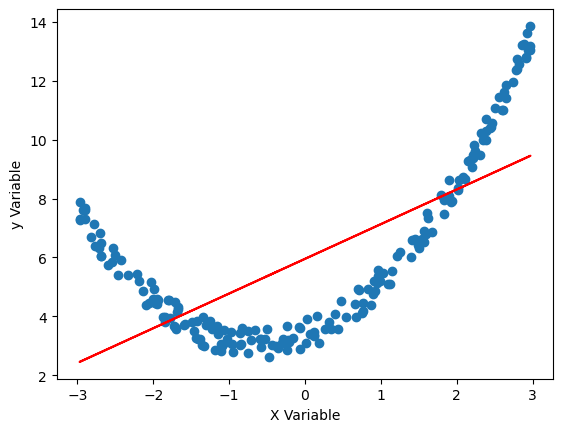

In [11]:
plt.scatter(x=x ,y=y)
plt.plot(x_train, y_pred_train, color = 'r')
plt.xlabel("X Variable")
plt.ylabel("y Variable")
plt.show()

## Applying Polynomial Regression Model with degree = 2

In [12]:
poly = PolynomialFeatures(degree = 2, include_bias = True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

## Build Linear Regression

In [13]:
linear_1 = LinearRegression()
linear_1.fit(x_train_trans, y_train)

LinearRegression()

## Predict

In [14]:
y_train_pred_ply = linear_1.predict(x_train_trans)
y_test_pred_ply = linear_1.predict(x_test_trans)

## Evaluate the model

In [15]:
print(r2_score(y_train, y_train_pred_ply))
print()
print(r2_score(y_test, y_test_pred_ply))

0.9909486423311652

0.9838275765901691


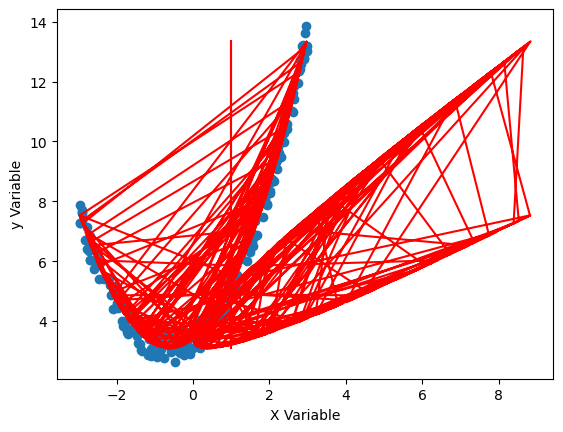

In [16]:
plt.scatter(x=x ,y=y)
plt.plot(x_train_trans, y_train_pred_ply, color = 'r')
plt.xlabel("X Variable")
plt.ylabel("y Variable")
plt.show()

## Regularization Approach

In [17]:
mgp_df  = pd.read_csv("C:\\Users\\hp\\Desktop\\Data Science\\Datasets\\auto-mpg.csv")
mgp_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
mgp_df["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [19]:
mgp_df["origin"] = mgp_df["origin"].replace({1:'America', 2:'Europe', 3:'Asia'})
mgp_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,America,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,America,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,America,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,America,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,America,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,America,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,America,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,America,ford ranger


In [20]:
mgp_df = pd.get_dummies(mgp_df, columns=['origin'])
mgp_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,ford torino,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,True,False,False
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,False,False,True
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,True,False,False
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,True,False,False


In [21]:
mgp_df["origin_America"] = mgp_df["origin_America"].astype(int)
mgp_df["origin_Asia"] = mgp_df["origin_Asia"].astype(int)
mgp_df["origin_Europe"] = mgp_df["origin_Europe"].astype(int)
mgp_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


In [22]:
mgp_df["car name"].nunique()

305

In [23]:
mgp_df = mgp_df.drop(['car name', 'origin_America'], axis=1)
mgp_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1
395,32.0,4,135.0,84,2295,11.6,82,0,0
396,28.0,4,120.0,79,2625,18.6,82,0,0


In [24]:
mgp_df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model year       0
origin_Asia      0
origin_Europe    0
dtype: int64

## To find the unique values in each varible 

In [25]:
for i in mgp_df.columns:
    print("*******************************************************************************",i,
         "***********************************************************************************",)
    print()
    print(set(mgp_df[i].tolist()))
    print()

******************************************************************************* mpg ***********************************************************************************

{9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.5, 27.5, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 29.5, 35.0, 31.5, 36.0, 33.5, 36.1, 39.4, 43.1, 35.7, 37.3, 41.5, 38.1, 46.6, 40.8, 44.3, 43.4, 44.6, 44.0, 14.5, 15.5, 16.5, 16.9, 17.5, 17.6, 18.5, 18.6, 18.1, 19.9, 19.4, 19.1, 20.5, 20.6, 21.5, 21.1, 21.6, 22.5, 22.4, 23.9, 23.6, 23.5, 24.5, 25.4, 25.1, 25.5, 26.4, 26.6, 27.4, 27.9, 28.4, 28.1, 29.9, 30.5, 30.9, 31.9, 31.6, 32.8, 32.1, 32.2, 32.7, 32.4, 33.8, 32.3, 33.7, 32.9, 34.1, 34.2, 34.5, 34.3, 34.7, 35.1, 34.4, 34.0, 36.4, 37.2, 37.0, 37.7, 38.0, 39.1, 39.0, 40.9, 16.2, 17.7, 18.2, 19.2, 19.8, 20.2, 20.8, 20.3, 22.3, 23.2, 23.8, 23.7, 24.3, 24.2, 25.8, 26.8, 27.2, 28.8, 29.8, 30.7, 31.8, 31.3}

********************************************************

In [26]:
mgp_df = mgp_df.replace('?',np.nan)
mgp_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1
395,32.0,4,135.0,84,2295,11.6,82,0,0
396,28.0,4,120.0,79,2625,18.6,82,0,0


In [27]:
mgp_df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       6
weight           0
acceleration     0
model year       0
origin_Asia      0
origin_Europe    0
dtype: int64

In [28]:
mgp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     392 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model year     398 non-null    int64  
 7   origin_Asia    398 non-null    int32  
 8   origin_Europe  398 non-null    int32  
dtypes: float64(3), int32(2), int64(3), object(1)
memory usage: 25.0+ KB


In [29]:
mgp_df['horsepower'] = pd.to_numeric(mgp_df['horsepower'])

<Axes: ylabel='horsepower'>

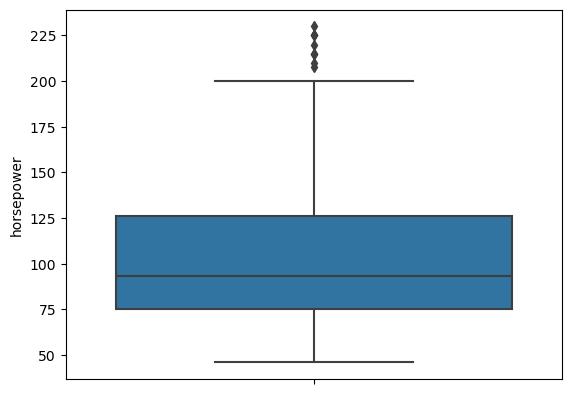

In [30]:
sns.boxplot(y = mgp_df['horsepower'], data = mgp_df)

In [31]:
mgp_df['horsepower'] = mgp_df['horsepower'].fillna(mgp_df['horsepower'].median())

## Split the Data into x and y

In [32]:
x = mgp_df.drop('mpg', axis = 1)
y = mgp_df[['mpg']]

In [33]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,8,307.0,130.0,3504,12.0,70,0,0
1,8,350.0,165.0,3693,11.5,70,0,0
2,8,318.0,150.0,3436,11.0,70,0,0
3,8,304.0,150.0,3433,12.0,70,0,0
4,8,302.0,140.0,3449,10.5,70,0,0


In [34]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


## Features Scalling Required 

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler = pd.DataFrame(x_scaler, columns = x.columns)
x_scaler.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.497643,-0.461968


## Split the data into train and test

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.25, random_state = 2)

## Fit the Linear Regression

In [39]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The co-efficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The co-efficient for cylinders is -1.1222047695874837
The co-efficient for displacement is 3.3161559758654655
The co-efficient for horsepower is -0.9830032614504679
The co-efficient for weight is -5.940829257647759
The co-efficient for acceleration is 0.13986472671490238
The co-efficient for model year is 2.8463217254344046
The co-efficient for origin_Asia is 1.0459970230639617
The co-efficient for origin_Europe is 1.252209166300804


## Part 1 - Regularization :- Lasso model and note the co-efficient value

In [49]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("The Co-efficient of Lasso :-", lasso.coef_)

The Co-efficient of Lasso :- [-0.          0.         -0.4070251  -4.69410796  0.          2.63344925
  0.62063928  0.76494147]


## Part 2 - Regularization :- Ridge Model and note the co-efficient value 

In [52]:
ridge = Ridge(alpha = 0.3)
ridge.fit(x_train, y_train)
print("The Co-efficient of Ridge :-", ridge.coef_)

The Co-efficient of Ridge :- [[-1.07894685  3.16612627 -0.99160727 -5.84538306  0.12364257  2.83529029
   1.03651229  1.2370243 ]]


## Compare Accuracy

In [53]:
y_pred_train_lr = regression_model.predict(x_train)
y_pred_test_lr = regression_model.predict(x_test)

y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [75]:
print("Linear Training :", r2_score(y_train, y_pred_train_lr))
print("Linear Testing :", r2_score(y_test, y_pred_test_lr))
print("Lasso Testing :", r2_score(y_train, y_pred_train_lasso))
print("Lasso Testing :", r2_score(y_test, y_pred_test_lasso))
print("Ridge Training :", r2_score(y_train, y_pred_train_ridge))
print("Ridge Testing :", r2_score(y_test, y_pred_test_ridge))

Linear Training : 0.809879596644161
Linear Testing : 0.8564835957286592
Lasso Testing : 0.8016770597561529
Lasso Testing : 0.8588117365773466
Ridge Training : 0.8098605896582229
Ridge Testing : 0.8569528879357784
